In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



In [2]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

import warnings

In [3]:
df = pd.read_csv('dataset\healthcare-dataset-stroke-data.csv')
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [12]:
df.shape

(5110, 12)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [14]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [4]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [5]:
duplicate = df[df.duplicated()]
print("These are duplicated rows " , duplicate )

These are duplicated rows  Empty DataFrame
Columns: [id, gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, stroke]
Index: []


In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 519.0+ KB


In [8]:
# Checking for Negative Value
columns=['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']

for a in range(len(columns)):
    print("Is there any negative value in '{}' column  : {} ".format(columns[a],(df[columns[a]]<0).any()))

Is there any negative value in 'age' column  : False 
Is there any negative value in 'hypertension' column  : False 
Is there any negative value in 'heart_disease' column  : False 
Is there any negative value in 'avg_glucose_level' column  : False 
Is there any negative value in 'bmi' column  : False 
Is there any negative value in 'stroke' column  : False 


In [10]:
# Checking for unique values
unique_values_per_column = {}

columns_to_check = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']

for col in columns_to_check:
    unique_values = df[col].unique()
    unique_values_per_column[col] = unique_values
    print(f"Unique values for {col}: {unique_values}")

Unique values for gender: ['Male' 'Female' 'Other']
Unique values for hypertension: [0 1]
Unique values for heart_disease: [1 0]
Unique values for ever_married: ['Yes' 'No']
Unique values for work_type: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Unique values for Residence_type: ['Urban' 'Rural']
Unique values for smoking_status: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
Unique values for stroke: [1 0]


In [15]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

<AxesSubplot:>

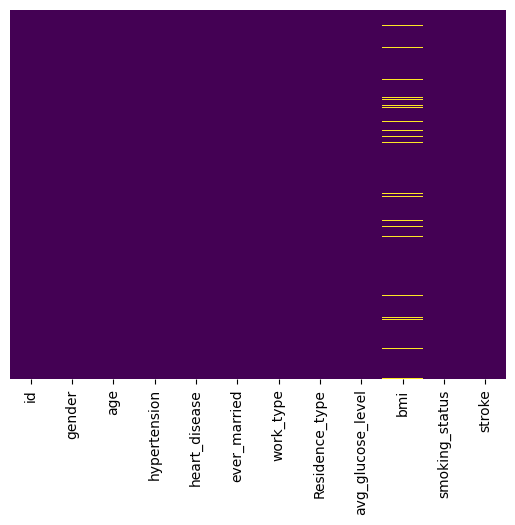

In [11]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [12]:
df['bmi']=df['bmi'].fillna(method='ffill')

<AxesSubplot:>

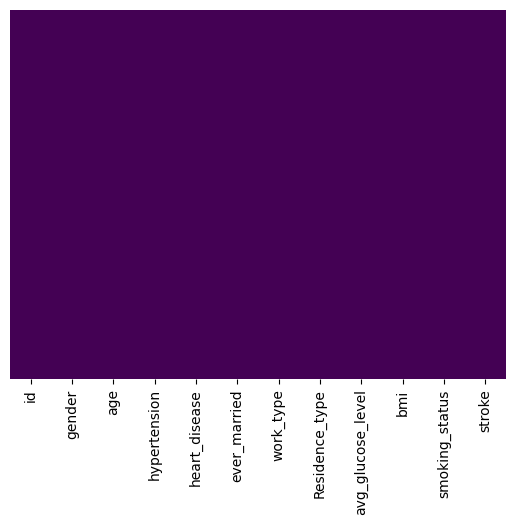

In [13]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [17]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

<AxesSubplot:xlabel='ever_married', ylabel='stroke'>

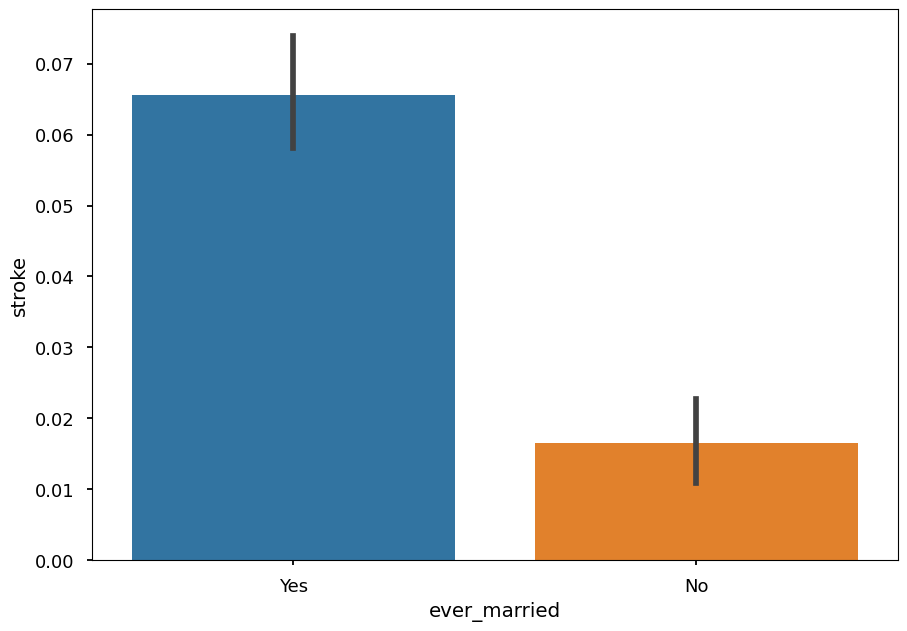

In [23]:
# Univariat Analysis
sns.barplot(df, x="ever_married", y="stroke")

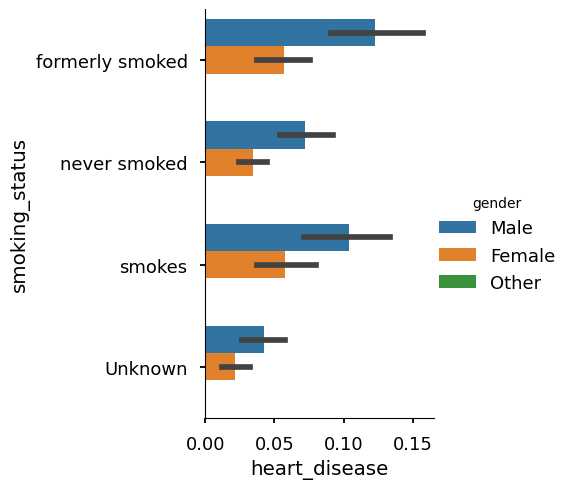

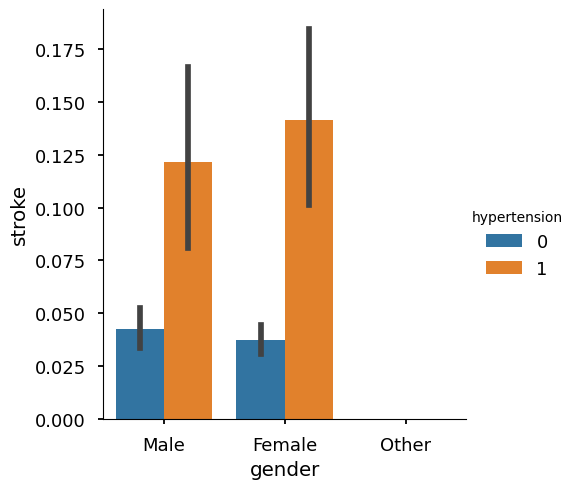

In [21]:
# Bivariat Analysis 
sns.catplot(df, x="heart_disease", y="smoking_status", hue="gender", kind="bar")

sns.catplot(data=df, x="gender", y="stroke", hue="hypertension", kind="bar")

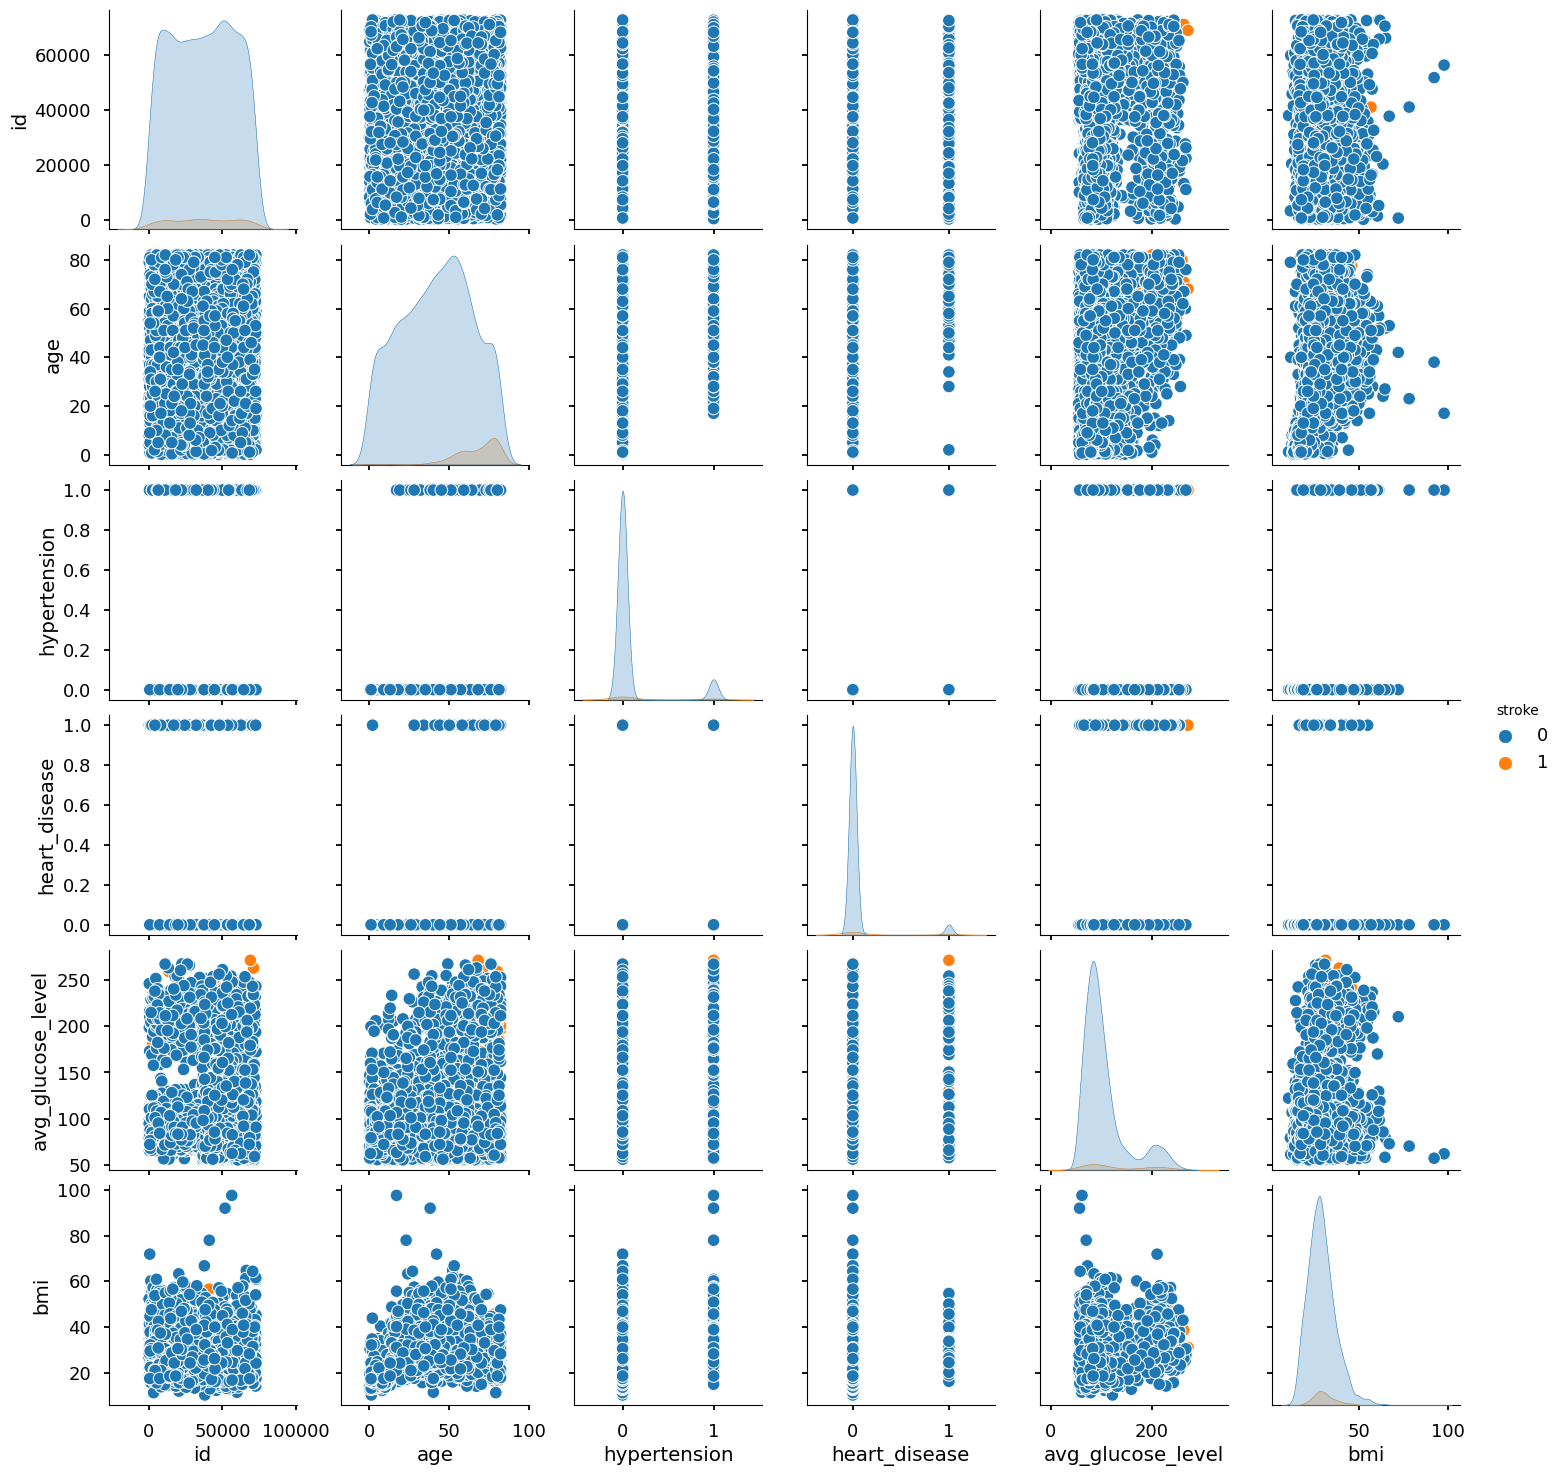

In [24]:
# Multivariate Analysis
sns.pairplot(df,hue = 'stroke')
plt.show()

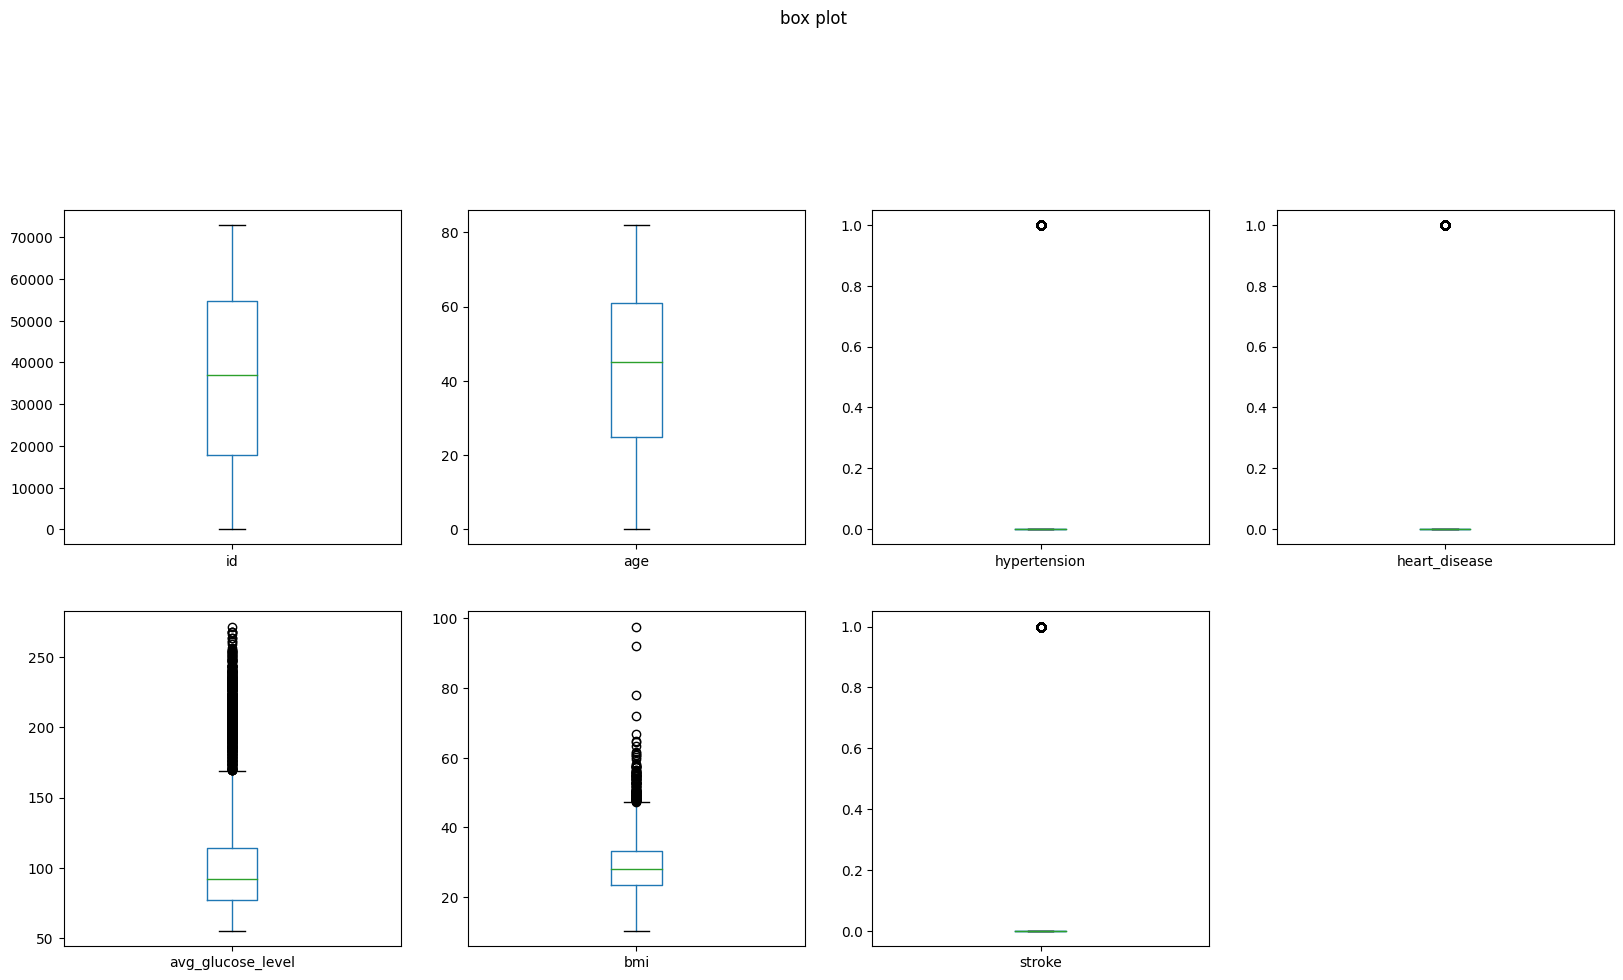

In [18]:
# Visualizing Outliers
df.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=[20,20], title='box plot')
plt.savefig('outliers_strk_data_boxplot')
plt.show()

<AxesSubplot:xlabel='age', ylabel='Count'>

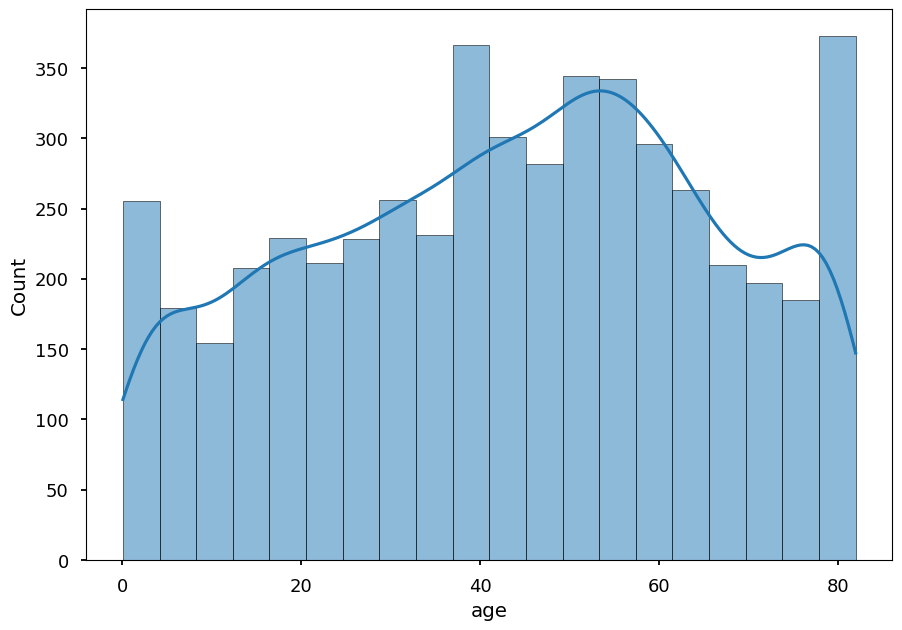

In [25]:
sns.histplot(df['age'], kde=True)

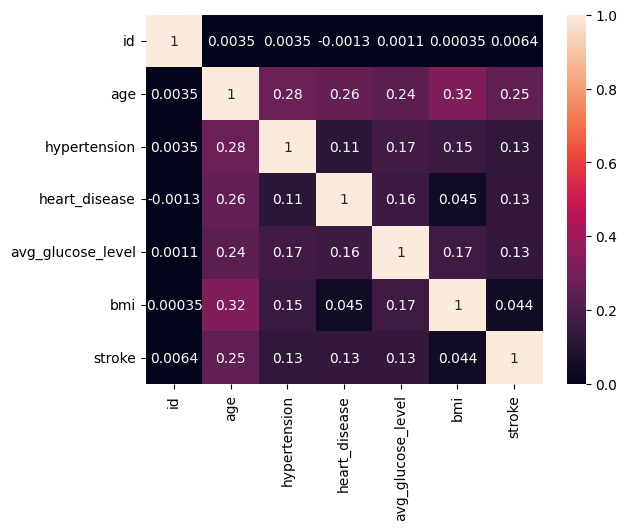

In [19]:
ax = sns.heatmap(df.corr(), annot=True)

In [20]:
outliers= []
non_out = []
def detect_outliers(data):
  threshold=3
  mean = np.mean(data)
  std = np.std(data)

  for i in data:
    z_score = (i - mean)/std
    if np.abs(z_score) > threshold:
      outliers.append(i)

    if np.abs(z_score) < threshold:
      non_out.append(i)

  return outliers

In [21]:
detect_outliers(df['avg_glucose_level'])

[252.72,
 243.58,
 259.63,
 249.31,
 263.32,
 271.74,
 242.52,
 250.89,
 247.51,
 243.53,
 242.3,
 243.5,
 251.6,
 247.69,
 250.2,
 254.6,
 254.63,
 246.34,
 251.46,
 267.76,
 246.53,
 244.28,
 251.99,
 253.16,
 242.84,
 249.29,
 242.94,
 247.48,
 266.59,
 243.73,
 243.59,
 250.8,
 255.17,
 267.61,
 260.85,
 248.37,
 263.56,
 247.97,
 248.24,
 253.93,
 254.95,
 247.87,
 261.67,
 256.74,
 244.3,
 242.62,
 243.52,
 267.6,
 253.86]

In [22]:
outliers_strk_data = df.copy()
outliers_strk_data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,36.6,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,18.6,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [23]:
IQR_dataset = sorted(outliers_strk_data['bmi'])
IQR_dataset

[10.3,
 11.3,
 11.5,
 12.0,
 12.3,
 12.8,
 13.0,
 13.2,
 13.3,
 13.4,
 13.5,
 13.7,
 13.7,
 13.8,
 13.8,
 13.9,
 14.0,
 14.1,
 14.1,
 14.1,
 14.1,
 14.1,
 14.2,
 14.2,
 14.2,
 14.2,
 14.3,
 14.3,
 14.3,
 14.4,
 14.4,
 14.5,
 14.5,
 14.6,
 14.6,
 14.6,
 14.6,
 14.8,
 14.8,
 14.8,
 14.8,
 14.9,
 15.0,
 15.0,
 15.1,
 15.1,
 15.1,
 15.1,
 15.1,
 15.1,
 15.1,
 15.1,
 15.2,
 15.2,
 15.2,
 15.2,
 15.3,
 15.3,
 15.3,
 15.3,
 15.4,
 15.4,
 15.4,
 15.5,
 15.5,
 15.5,
 15.5,
 15.5,
 15.6,
 15.6,
 15.6,
 15.7,
 15.7,
 15.7,
 15.8,
 15.8,
 15.8,
 15.8,
 15.8,
 15.8,
 15.9,
 15.9,
 15.9,
 15.9,
 15.9,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.1,
 16.1,
 16.1,
 16.1,
 16.1,
 16.1,
 16.1,
 16.1,
 16.2,
 16.2,
 16.2,
 16.2,
 16.2,
 16.2,
 16.2,
 16.2,
 16.2,
 16.2,
 16.2,
 16.3,
 16.3,
 16.3,
 16.3,
 16.3,
 16.3,
 16.3,
 16.3,
 16.3,
 16.3,
 16.3,
 16.3,
 16.4,
 16.4,
 16.4,
 16.4,
 16.4,
 16.4,
 16.4,
 16.4,
 16.4,
 16.4,
 16.4,
 16.4,
 16.5,
 16.5,
 16.5,
 16.5,
 16.6,
 16.6,
 16.6,

In [24]:
q1,q3 = np.percentile(IQR_dataset,[25,75])

print(q1,q3)

23.6 33.1


In [25]:
iqr = q3-q1
print(iqr)

9.5


In [26]:
# Find the lower fence and higher fence
lower_fence = q1-1.5*iqr
higher_fence = q3+1.5*iqr
print(lower_fence, higher_fence)

9.350000000000001 47.35


In [27]:
df2 = df.copy()
df2

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,36.6,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,18.6,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [28]:
df2=df2[df2['bmi']>9]
df2

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,36.6,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,18.6,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [29]:
df2=df2[df2['bmi']< 45]
df2

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,36.6,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,18.6,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


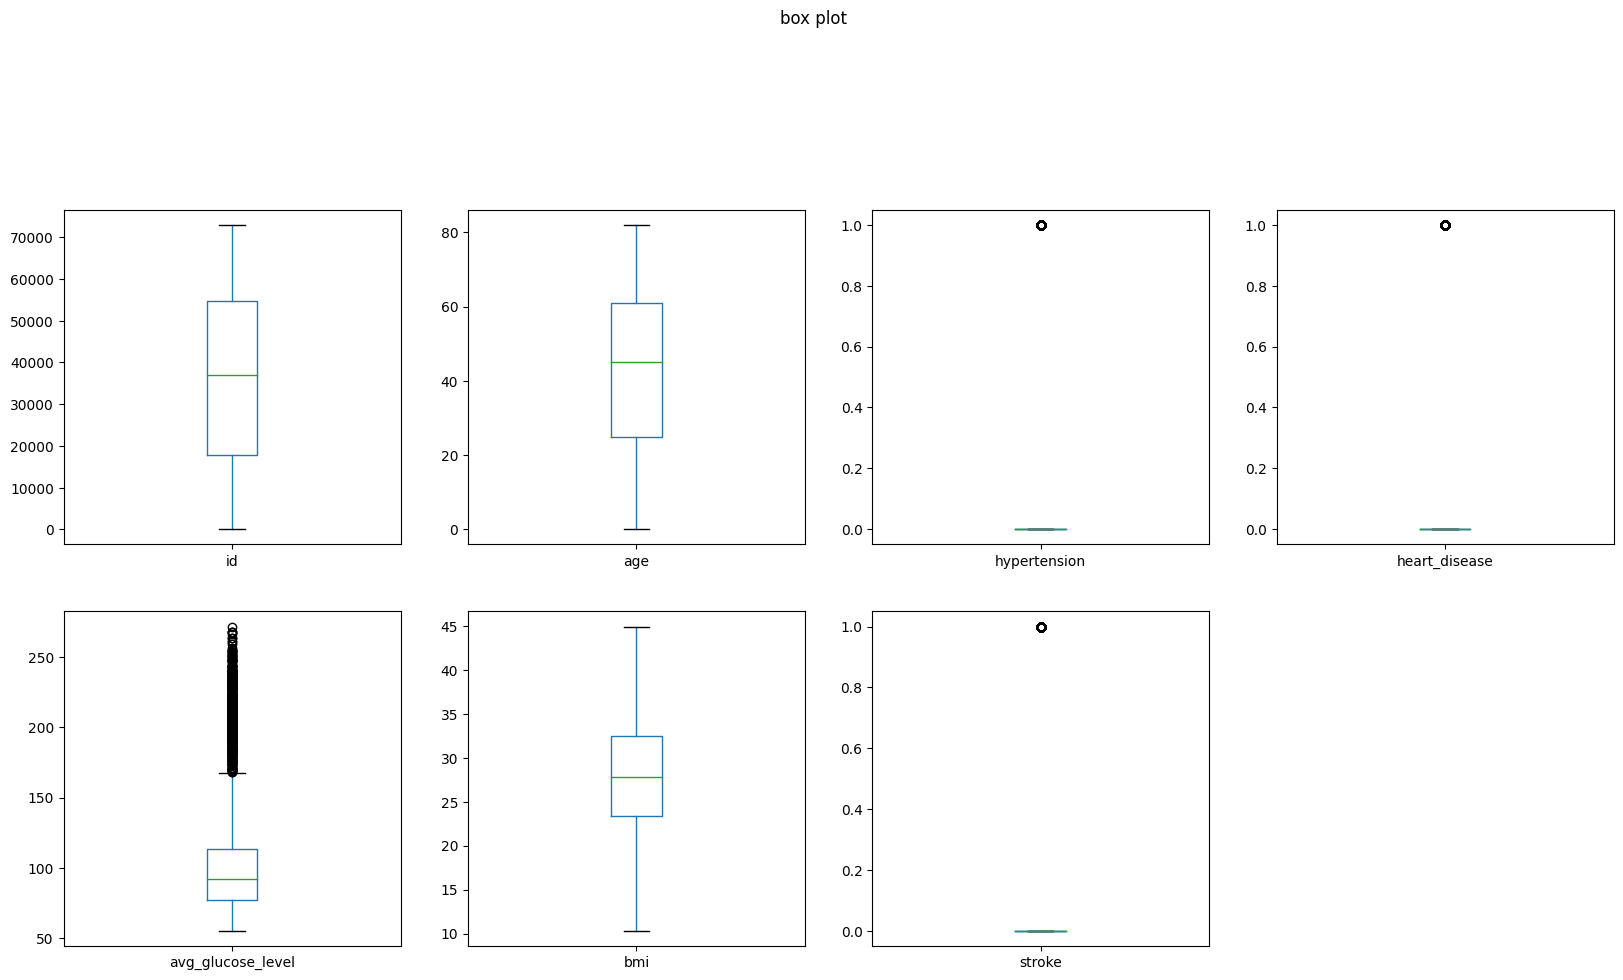

In [30]:
df2.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=[20,20], title='box plot')
plt.savefig('outliers_strk_data_boxplot')
plt.show()

In [31]:
IQR_dataset2 = sorted(outliers_strk_data['avg_glucose_level'])
IQR_dataset2

q1,q3 = np.percentile(IQR_dataset2,[25,75])

print(q1,q3)

77.24499999999999 114.09


In [32]:
iqr = q3-q1
print(iqr)

36.84500000000001


In [33]:
# Find the lower fence and higher fence
lower_fence = q1-1.5*iqr
higher_fence = q3+1.5*iqr
print(lower_fence, higher_fence)

21.97749999999997 169.35750000000002


In [34]:
df2=df2[df2['avg_glucose_level']>22]
df2

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,36.6,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,18.6,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [35]:
df2=df2[df2['avg_glucose_level']>169]
df2

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,36.6,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5061,38009,Male,41.0,0,0,Yes,Private,Urban,223.78,32.3,never smoked,0
5062,11184,Female,82.0,0,0,Yes,Self-employed,Rural,211.58,36.9,never smoked,0
5063,68967,Male,39.0,0,0,Yes,Private,Urban,179.38,27.7,Unknown,0
5064,66684,Male,70.0,0,0,Yes,Self-employed,Rural,193.88,24.3,Unknown,0


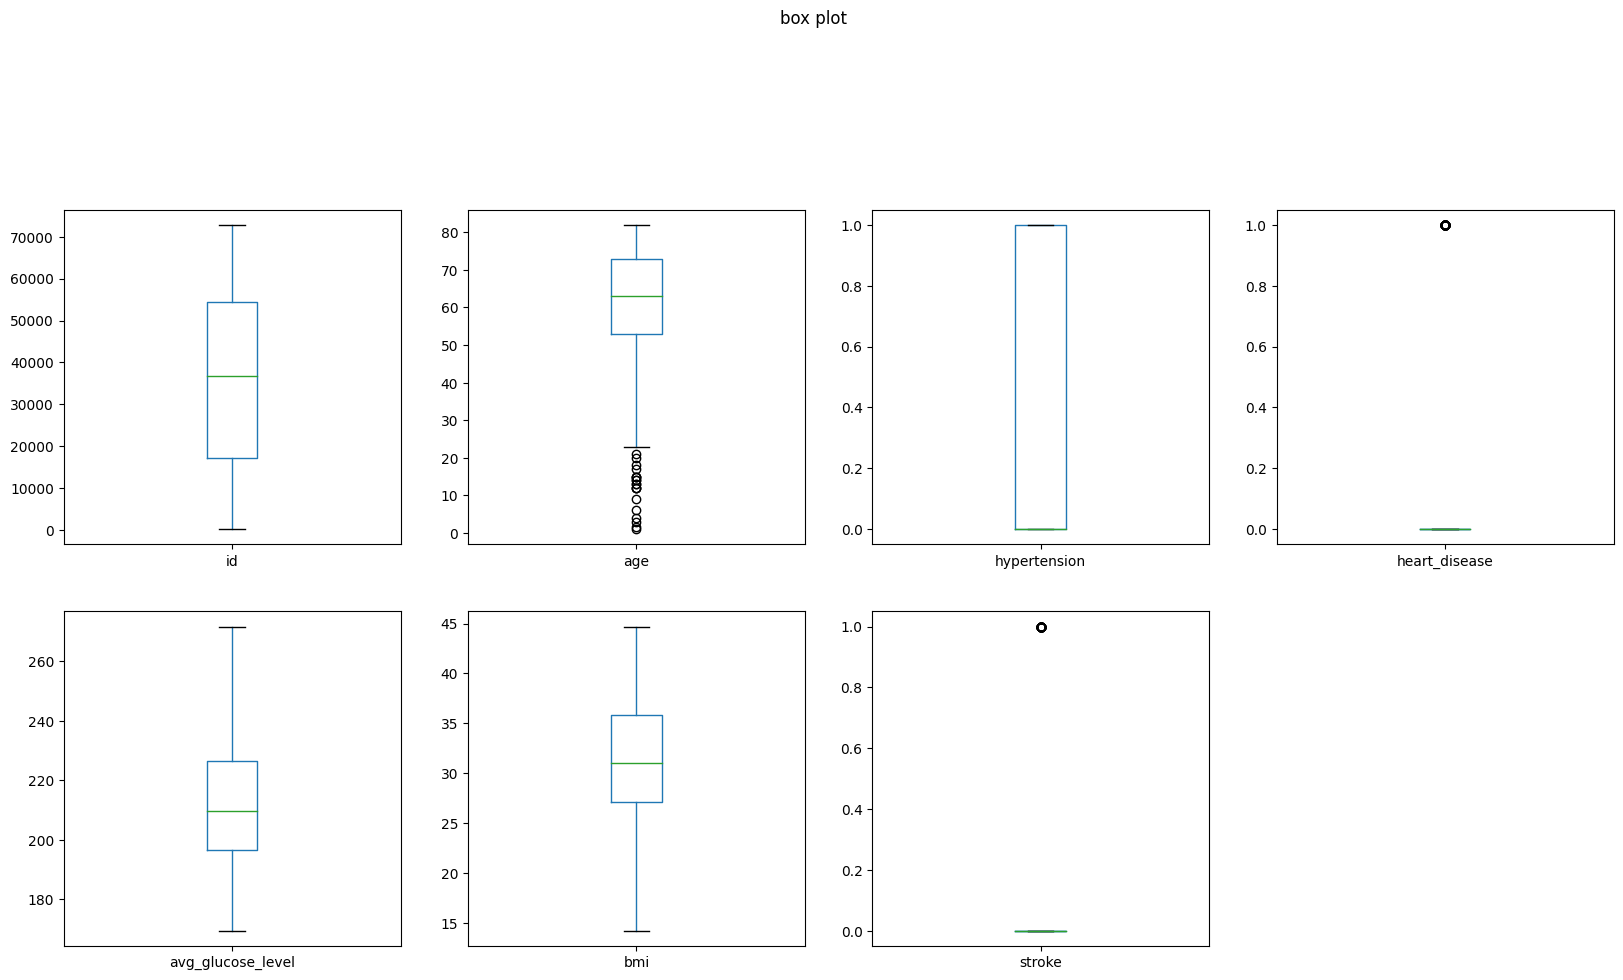

In [36]:
df2.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=[20,20], title='box plot')
plt.savefig('outliers_strk_data_boxplot')
plt.show()

In [37]:
df2['stroke'].value_counts()

0    501
1     78
Name: stroke, dtype: int64

In [38]:
# df1=df2.copy()

In [39]:
# df1.to_csv('healthcare-dataset-stroke-data1.csv')

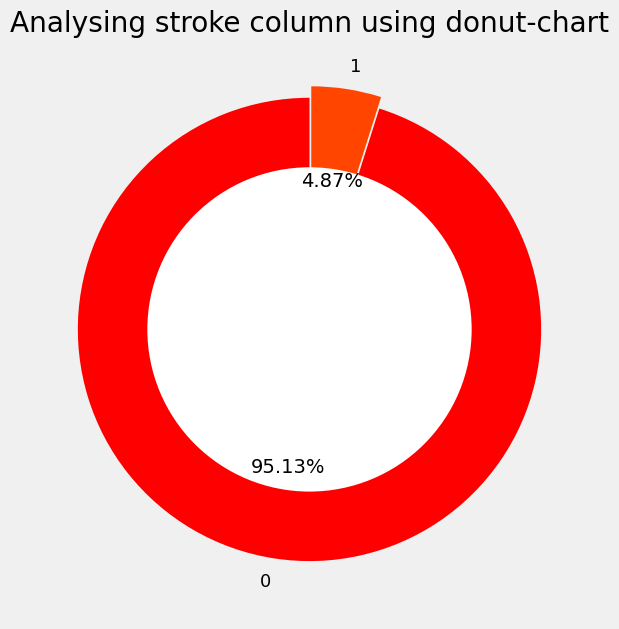

In [28]:
# Visualizing imbalanced dataset

with plt.style.context(style="fivethirtyeight"):
    plt.pie(x=dict(df2['stroke'].value_counts()).values(),
           labels=dict(df2['stroke'].value_counts()).keys(),
           autopct="%.2f%%",
           colors=['red','orangered'],
           startangle=90,
           explode=[0,0.05])
    centre_circle=plt.Circle((0,0),0.70,fc='white')
    fig=plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.title(label="Analysing stroke column using donut-chart")
    plt.show()
    
    

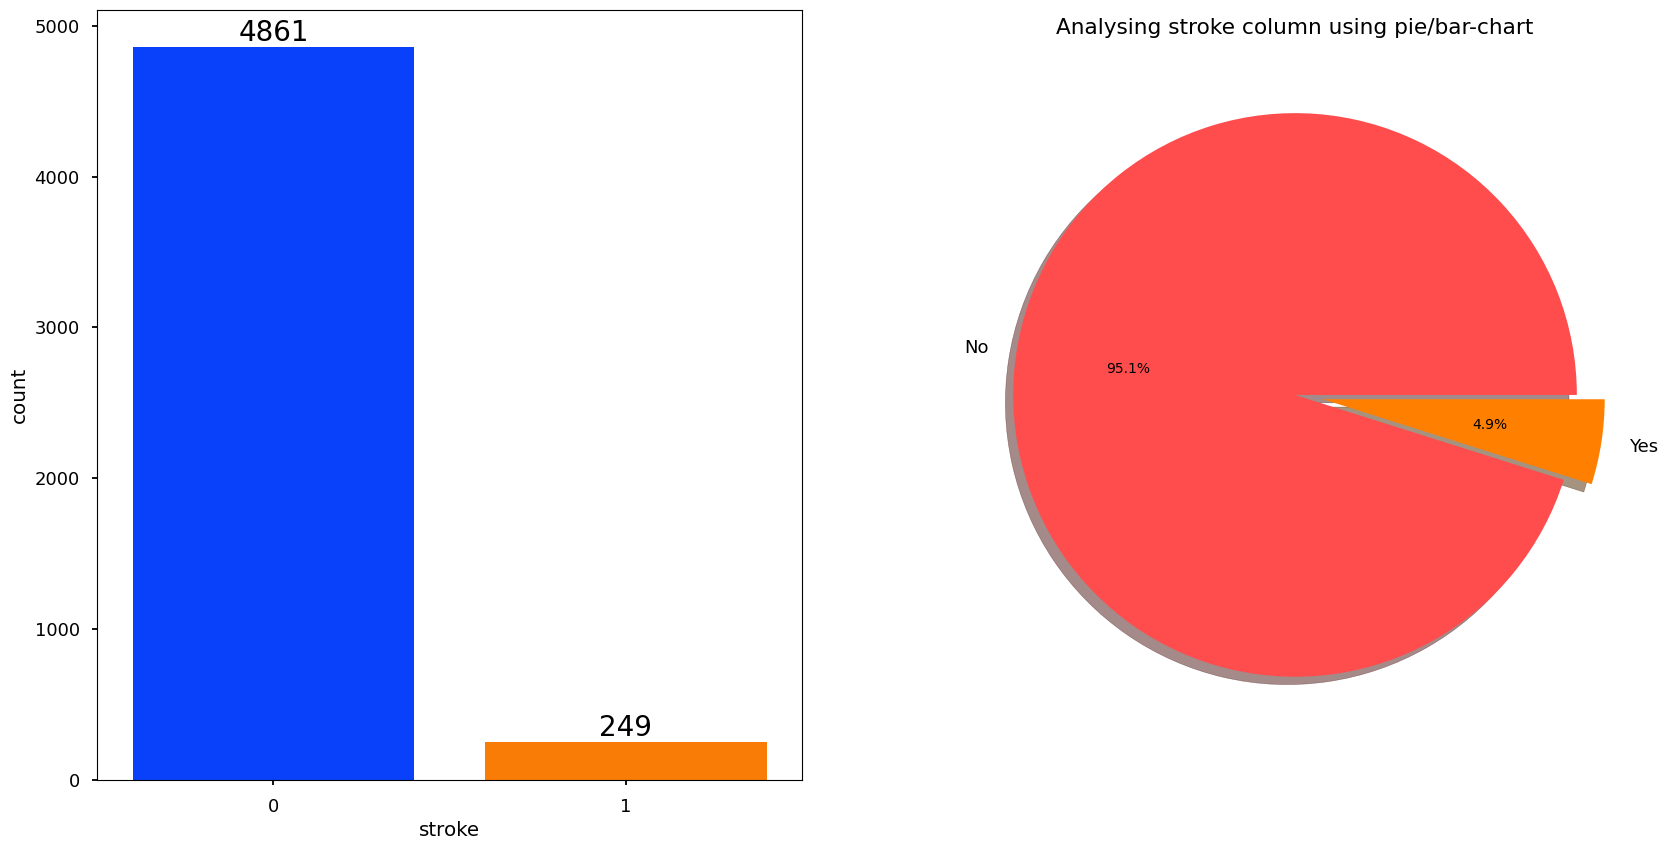

In [29]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df2['stroke'],data=df2,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x=df2['stroke'].value_counts(),labels=["No","Yes"],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.title(label="Analysing stroke column using pie/bar-chart")
plt.show()

In [68]:
#solving imbalanced dataset
df2.drop(columns='id', inplace=True)
df2

c:\Users\HP\Stroke_Predicions\venv\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,36.6,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5061,Male,41.0,0,0,Yes,Private,Urban,223.78,32.3,never smoked,0
5062,Female,82.0,0,0,Yes,Self-employed,Rural,211.58,36.9,never smoked,0
5063,Male,39.0,0,0,Yes,Private,Urban,179.38,27.7,Unknown,0
5064,Male,70.0,0,0,Yes,Self-employed,Rural,193.88,24.3,Unknown,0


In [71]:
y =  df2['stroke']
y

0       1
1       1
3       1
4       1
5       1
       ..
5061    0
5062    0
5063    0
5064    0
5076    0
Name: stroke, Length: 579, dtype: int64

In [70]:
X = df2.drop(columns=['stroke'], axis=1)
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,36.6,never smoked
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked
...,...,...,...,...,...,...,...,...,...,...
5061,Male,41.0,0,0,Yes,Private,Urban,223.78,32.3,never smoked
5062,Female,82.0,0,0,Yes,Self-employed,Rural,211.58,36.9,never smoked
5063,Male,39.0,0,0,Yes,Private,Urban,179.38,27.7,Unknown
5064,Male,70.0,0,0,Yes,Self-employed,Rural,193.88,24.3,Unknown


In [72]:
from imblearn.over_sampling import (RandomOverSampler)

In [74]:
resamp = RandomOverSampler()
X, y = resamp.fit_resample(X, y)

In [75]:
y.value_counts()

1    501
0    501
Name: stroke, dtype: int64

In [76]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

In [77]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),
    ]
)

In [78]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((801, 10), (201, 10))

In [79]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [83]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [85]:
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Neighbors Classifier": KNeighborsClassifier(),
    "Decision Tree": tree.DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "XGBClassifier": XGBClassifier(),
    "CatBoosting Classifier": CatBoostClassifier(verbose=False),
    "AdaBoost Classifier": AdaBoostClassifier
()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')

Logistic Regression
Model performance for Training set
- Root Mean Squared Error: 0.5474
- Mean Absolute Error: 0.2996
- R2 Score: -0.1987
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.5816
- Mean Absolute Error: 0.3383
- R2 Score: -0.3560


K-Neighbors Classifier
Model performance for Training set
- Root Mean Squared Error: 0.3838
- Mean Absolute Error: 0.1473
- R2 Score: 0.4107
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.4679
- Mean Absolute Error: 0.2189
- R2 Score: 0.1226


Decision Tree
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.2908
- Mean Absolute Error: 0.0846
- R2 Score: 0.6610


Random Forest Classifier
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score

In [86]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
4,XGBClassifier,0.860417
3,Random Forest Classifier,0.780655
5,CatBoosting Classifier,0.740774
2,Decision Tree,0.661012
1,K-Neighbors Classifier,0.122619
6,AdaBoost Classifier,-0.056845
0,Logistic Regression,-0.355952
